# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

## Comments

Q1 -> Good
Q2 -> Good
Q3 -> Good
Q4 -> Good
Q5 -> Good It would be a good idea to check the df counts as well
Q6 -> Good
Q7 -> Good
Q8 -> Good  df.hist() is a useful command to get quick distribution plots of all the columns
Q9 -> Good
Q10 -> hough slightly skewed, in this setting there is no need to correct anything.
Q11 -> Good
Q12 -> Colinearity is not a concern here. The corr shows very low correlations between the  variables
Q13 -> Good
Q14 -> Good


### Step 1: Load the python libraries you will need for this project 

In [55]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [6]:
len(df_raw)

400

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a greater range which is 0 - 800 and can have more probable deviations from the mean. While GPA range is from 0 - 4. 

#### Question 4. Drop data points with missing data


In [12]:
df_withoutnulls = df_raw.dropna()
df_withoutnulls.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

In [15]:
df_withoutnulls.isnull().any()

admit       False
gre         False
gpa         False
prestige    False
dtype: bool

#### Question 6. Create box plots for GRE and GPA

In [16]:
#boxplot 1

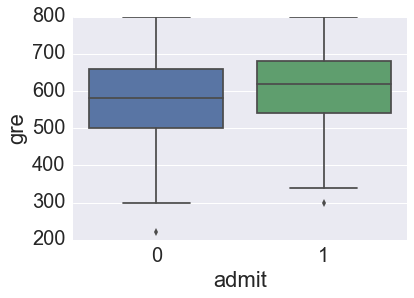

In [82]:
GRE_plt = sns.boxplot(x='admit', y='gre', data=df_withoutnulls)

In [46]:
#boxplot 2 

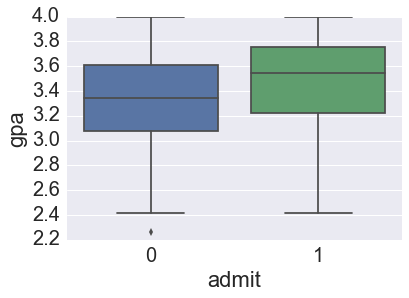

In [83]:
GPA_plt = sns.boxplot(x='admit', y='gpa', data=df_withoutnulls)

#### Question 7. What do this plots show?

Answer: These boxplots are a standardize way of displaying the distribution of data based on five number summary: minimum, first quartile, median, third quartile, and maximum. The rectangle box is the interquartile range. Outliners are 3xIQR or more above the third quartile. Suspected outliners are 1.5xIQR above the third quartile. 
The GPA and GRE doesn't really impact your admission chances to UCLA.

#### Question 8. Describe each distribution 

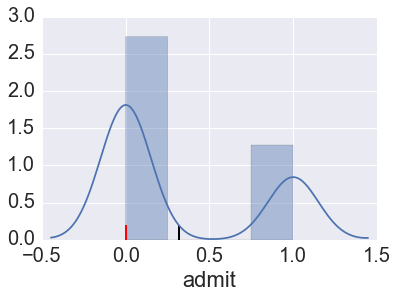

In [67]:
# plot the distribution of each variable 
admit_dist = sns.distplot(df_withoutnulls.admit)
plt.vlines(df_withoutnulls.admit.mean(), ymin=0, ymax=0.2, linewidth=2.0)
plt.vlines(df_withoutnulls.admit.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red");

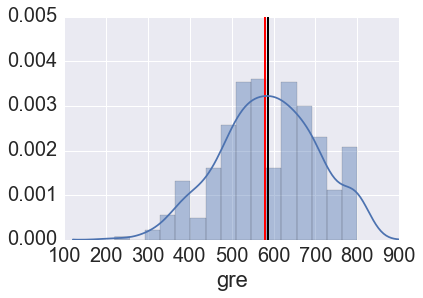

In [71]:
gre_dist = sns.distplot(df_withoutnulls.gre)
plt.vlines(df_withoutnulls.gre.mean(), ymin=0, ymax=0.005, linewidth=2.0)
plt.vlines(df_withoutnulls.gre.median(), ymin=0, ymax=0.005, linewidth=2.0, color="red");

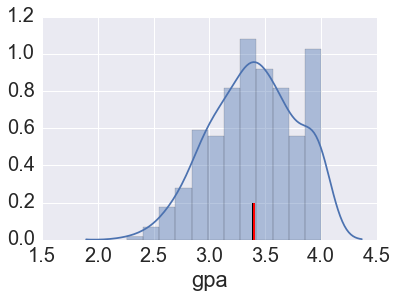

In [75]:
gpa_dist = sns.distplot(df_withoutnulls.gpa)
plt.vlines(df_withoutnulls.gpa.mean(), ymin=0, ymax=0.2, linewidth=2.0)
plt.vlines(df_withoutnulls.gpa.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red");

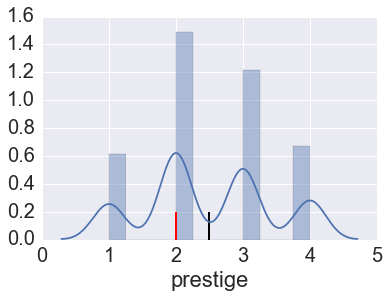

In [79]:
prestige_dist = sns.distplot(df_withoutnulls.prestige)
plt.vlines(df_withoutnulls.prestige.mean(), ymin=0, ymax=0.2, linewidth=2.0)
plt.vlines(df_withoutnulls.prestige.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red");

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: GPA and GRE have a normal distribution but their data is slightly skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: GRE and GPA needs to be corrected because the data looks slightly skewed. 

#### Question 11. Which of our variables are potentially colinear? 

In [85]:
df_withoutnulls.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


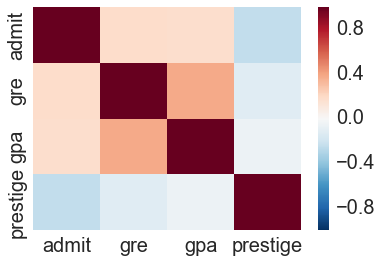

In [88]:
sns.heatmap(df_withoutnulls.corr())

#### Question 12. What did you find?

Answer: GRE and GPA are correlated at 0.382408. Students with higher GPA will scored higher on the GRE and vice versa. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: The problem statement would be if the prestige of the school effects the students admission chance to UCLA. You can plot to see how many schools got into UCLA by grouping the prestige column. GRE and GPA should be left out as we are only looking at the prestige of undergraduate schools. 

#### Question 14. What is your hypothesis? 

Answer: Students in high prestige school have a greater chance of being accepted into UCLA graduate school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data